In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Layer
from tensorflow.keras import Model
from tensorflow.keras.layers import Input
from sklearn.metrics import mean_absolute_error
from tensorflow.keras import layers
from tensorflow.keras.initializers import RandomNormal

In [2]:
class Custom_Hidden_layer(layers.Layer):
    '''
    Creates a custom hidden layer with 2 parameters, units and activation.
    units: Basically the number of neurons for the layer.
    activation: Activation function to be used for the layer.
    '''
    def __init__(self, units, activation=None,**kwargs):
        super(Custom_Hidden_layer, self).__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)
        
    def build(self, input_shape):
        '''
        Creating 3 weights a,b,c and 3 matrices which are then turned into the weight matrix 
        [[a,b,c,b],[b,a,b,c],[c,b,a,b],[b,c,b,a]]
        '''
        self.a = self.add_weight(
                        name = 'a',
                        shape=(1,),
                        initializer=RandomNormal(stddev=0.01),
                        trainable=True
                    )
        self.b = self.add_weight(
                        name = 'b',
                        shape=(1,),
                        initializer=RandomNormal(stddev=0.01),
                        trainable=True
                    )
        self.c = self.add_weight(
                        name = 'c',
                        shape=(1,),
                        initializer=RandomNormal(stddev=0.01),
                        trainable=True
                    )

        self.mat_a = tf.constant(
                        [[1,0,0,0], [0,1,0,0], [0,0,1,0],[0,0,0,1]], 
                        dtype=tf.float32
                    )
        self.mat_b = tf.constant(
                        [[0,1,0,1], [1,0,1,0], [0,1,0,1],[1,0,1,0]], 
                        dtype=tf.float32
                    )
        self.mat_c = tf.constant(
                        [[0,0,1,0], [0,0,0,1], [1,0,0,0],[0,1,0,0]],
                        dtype=tf.float32
                    )
    
    def call(self, inputs):
        '''
        Triggered when the layer is used.
        Operation performed: Matrix multplication between the inputs(X_DATA) and weight matrix.
        '''
        self.W = tf.multiply(self.a,self.mat_a) + tf.multiply(self.b,self.mat_b) + tf.multiply(self.c,self.mat_c)
        return self.activation(tf.matmul(inputs,self.W))
    
    def get_config(self):
        config = super(Custom_Hidden_layer, self).get_config()
        config.update({"units": self.units})
        return config

In [3]:
class Custom_Output_layer(layers.Layer):
    '''
    Creates a custom output layer with 2 parameters, units and activation.
    units: Basically the number of neurons for the layer.
    activation: Activation function to be used for the layer.
    '''
    def __init__(self,units, activation=None, **kwargs):
        super(Custom_Output_layer, self).__init__(**kwargs)
        self.units = units
        self.activation = tf.keras.activations.get(activation)

    def build(self, input_shape):
        '''
        Creating 1 weight d and 1 matrices which is then turned into the weight matrix 
        [[d,-d,-d,d],[-d,-d,d,d]]
        '''
        self.d = self.add_weight(name = 'd',
                                 shape=(1,), 
                                 initializer=RandomNormal(stddev=0.05),
                                 trainable=True)
        
        self.mat_d = tf.constant(
            [[1,-1], 
             [-1,-1], 
             [-1,1],
             [1,1]], dtype=tf.float32)

    def call(self, inputs):
        '''
        Triggered when the layer is used.
        Operation performed: Matrix multplication between the inputs(X_DATA) and weight matrix.
        We will be using tanh in the last layer as the output coordinates lies between (-1,+1).
        '''
        self.W = tf.multiply(self.d, self.mat_d)
        return self.activation(tf.matmul(inputs, self.W))
    
    def get_config(self):
        config = super(Custom_Output_layer, self).get_config()
        config.update({"units": self.units})
        return config

In [4]:
df_train = pd.read_csv('./augmented_data_[100].csv')
df_val = pd.read_csv('./leakage_dataset_validation_1000.csv')

x1_train, x2_train, x3_train, x4_train = np.array(df_train['mfc1']), np.array(df_train['mfc2']), np.array(df_train['mfc3']), np.array(df_train['mfc4'])
y1_train, y2_train = np.array(df_train['y1']), np.array(df_train['y2'])

x1_test, x2_test, x3_test, x4_test = np.array(df_val['mfc1']), np.array(df_val['mfc2']), np.array(df_val['mfc3']), np.array(df_val['mfc4'])
y1_test, y2_test = np.array(df_val['y1']), np.array(df_val['y2'])


diff = np.mean(x4_train-(x1_train+x2_train+x3_train)/3)
x4_train=x4_train-diff

X_train, y_train = np.column_stack((x1_train,x2_train,x3_train,x4_train)), np.column_stack((y1_train,y2_train))
X_test, y_test = np.column_stack((x1_test,x2_test,x3_test,x4_test)), np.column_stack((y1_test,y2_test))

# X_train = preprocessing.normalize(X_train)
# y_train = preprocessing.normalize(y_train)

# X_test = preprocessing.normalize(X_test)
# y_test = preprocessing.normalize(y_test)

In [5]:
# for 1000 train data set
# model = tf.keras.models.Sequential()
# model.add(Custom_Hidden_layer(32))
# model.add(Custom_Output_layer(2,'tanh'))

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#             loss = ['mse'],
#             metrics = ['mae']
# )
# history = model.fit(X_train, y_train,epochs=100, batch_size= 10)

In [6]:
# for 100 train data set

# model = tf.keras.models.Sequential()
# model.add(Custom_Hidden_layer(32))
# model.add(Custom_Output_layer(2,'tanh'))

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#             loss = ['mse'],
#             metrics = ['mae']
# )
# history = model.fit(X_train, y_train,epochs=50, batch_size= 5)

In [7]:
# for 1000 augmented train data set

# model = tf.keras.models.Sequential()
# model.add(Custom_Hidden_layer(32))
# model.add(Custom_Output_layer(2,'tanh'))

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#             loss = ['mse'],
#             metrics = ['mae']
# )

# history = model.fit(X_train, y_train,epochs=100, batch_size= 100)

In [8]:
# for 100 augmented train data set

# model = tf.keras.models.Sequential()
# model.add(Custom_Hidden_layer(32))
# model.add(Custom_Output_layer(2,'tanh'))

# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
#             loss = ['mse'],
#             metrics = ['mae']
# )
# history = model.fit(X_train, y_train,epochs=100, batch_size= 10)

In [9]:
model = tf.keras.models.Sequential()
model.add(Custom_Hidden_layer(32))
model.add(Custom_Output_layer(2,'tanh'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss = ['mse'],
            metrics = ['mae']
)
history = model.fit(X_train, y_train,epochs=100, batch_size= 10)

Epoch 1/100
80/80 [==============================] - 1s 2ms/step - loss: 0.3449 - mae: 0.5084
Epoch 2/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3449 - mae: 0.5084
Epoch 3/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3445 - mae: 0.5081
Epoch 4/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3438 - mae: 0.5076
Epoch 5/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3429 - mae: 0.5069
Epoch 6/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3418 - mae: 0.5061
Epoch 7/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3404 - mae: 0.5050
Epoch 8/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3388 - mae: 0.5039
Epoch 9/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3371 - mae: 0.5025
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.3351 - mae: 0.5011
Epoch 11/100
80/80 [==============================] - 0s 2m

80/80 [==============================] - 0s 2ms/step - loss: 0.0639 - mae: 0.2018
Epoch 88/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0619 - mae: 0.1982
Epoch 89/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0601 - mae: 0.1947
Epoch 90/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0583 - mae: 0.1912
Epoch 91/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0565 - mae: 0.1878
Epoch 92/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0548 - mae: 0.1845
Epoch 93/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0532 - mae: 0.1813
Epoch 94/100
80/80 [==============================] - 0s 3ms/step - loss: 0.0516 - mae: 0.1781
Epoch 95/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0501 - mae: 0.1750
Epoch 96/100
80/80 [==============================] - 0s 2ms/step - loss: 0.0487 - mae: 0.1720
Epoch 97/100
80/80 [==============================] - 0s 2ms/st

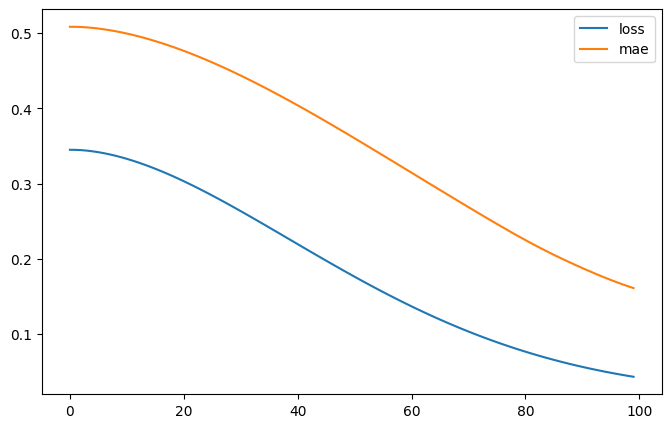

In [10]:
history_frame = pd.DataFrame(history.history)
history_frame.plot(figsize=(8,5))
plt.show()

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 custom__hidden_layer (Custo  (10, 4)                  3         
 m_Hidden_layer)                                                 
                                                                 
 custom__output_layer (Custo  (10, 2)                  1         
 m_Output_layer)                                                 
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [12]:
y_pred = model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error: ", mse)

32/32 [==============================] - 0s 839us/step
Mean absolute Error:  0.13391248672246375


In [13]:
model.save('./model_equivariant_[1000]_augmented.h5')

In [14]:
model_test = tf.keras.models.load_model('./model_equivariant_[1000]_augmented.h5', 
                                        custom_objects={
                                            'Custom_Hidden_layer':Custom_Hidden_layer,
                                            'Custom_Output_layer':Custom_Output_layer
                                        })

In [15]:
y_pred = model_test.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute Error: ", mae)

32/32 [==============================] - 0s 968us/step
Mean absolute Error:  0.11531693879318916


In [16]:
# model.save('./model_equivariant_[100]_augmented_11.h5')